In [0]:
import seaborn as sns
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Define movies dataset
movies_dataset = data.movies()
movies_dataset.tail()

# Replace NaN values with 0
movies_dataset.US_DVD_Sales.fillna(0,inplace=True)
movies_dataset.US_Gross.fillna(0,inplace=True)
movies_dataset.Worldwide_Gross.fillna(0,inplace=True)
movies_dataset.Rotten_Tomatoes_Rating.fillna(50,inplace=True)
movies_dataset.IMDB_Rating.fillna(5, inplace=True)
movies_dataset.Production_Budget.fillna(30000000, inplace=True)
movies_dataset.tail()
print(movies_dataset.isnull().sum())

Creative_Type              446
Director                  1331
Distributor                232
IMDB_Rating                  0
IMDB_Votes                 213
MPAA_Rating                605
Major_Genre                275
Production_Budget            0
Release_Date                 0
Rotten_Tomatoes_Rating       0
Running_Time_min          1992
Source                     365
Title                        1
US_DVD_Sales                 0
US_Gross                     0
Worldwide_Gross              0
dtype: int64


In [4]:
#Normalize Rotten tomato ratings and create a new average rating 
movies_dataset["IMDB_RT_Rating"] = ((movies_dataset["IMDB_Rating"] + movies_dataset["Rotten_Tomatoes_Rating"]/10)/2).round(1)

#New measure for ROI
movies_dataset["Gross_Margin"] = (((movies_dataset['Worldwide_Gross']-movies_dataset["Production_Budget"])/(movies_dataset["Worldwide_Gross"]))*100).round(1)

# Extract year and month from Released_Date attribute
movies_dataset["year"] = pd.DatetimeIndex(movies_dataset["Release_Date"]).year
movies_dataset["month"] = pd.DatetimeIndex(movies_dataset["Release_Date"]).month

movies_dataset.head()

,Creative_Type,Director,Distributor,IMDB_Rating,IMDB_Votes,MPAA_Rating,Major_Genre,Production_Budget,Release_Date,Rotten_Tomatoes_Rating,Running_Time_min,Source,Title,US_DVD_Sales,US_Gross,Worldwide_Gross,IMDB_RT_Rating,Gross_Margin,year,month
0,None,None,Gramercy,6.1,1071.0,R,None,8000000.0,Jun 12 1998,50.0,NaN,None,The Land Girls,0.0,146083.0,146083.0,5.6,-5376.3,1998,6
1,None,None,Strand,6.9,207.0,R,Drama,300000.0,Aug 07 1998,50.0,NaN,None,"First Love, Last Rites",0.0,10876.0,10876.0,6.0,-2658.4,1998,8
2,None,None,Lionsgate,6.8,865.0,None,Comedy,250000.0,Aug 28 1998,50.0,NaN,None,I Married a Strange Person,0.0,203134.0,203134.0,5.9,-23.1,1998,8
3,None,None,Fine Line,5.0,NaN,None,Comedy,300000.0,Sep 11 1998,13.0,NaN,None,Let's Talk About Sex,0.0,373615.0,373615.0,3.2,19.7,1998,9
4,Contemporary Fiction,None,Trimark,3.4,165.0,R,Drama,1000000.0,Oct 09 1998,62.0,NaN,Original Screenplay,Slam,0.0,1009819.0,1087521.0,4.8,8.0,1998,10


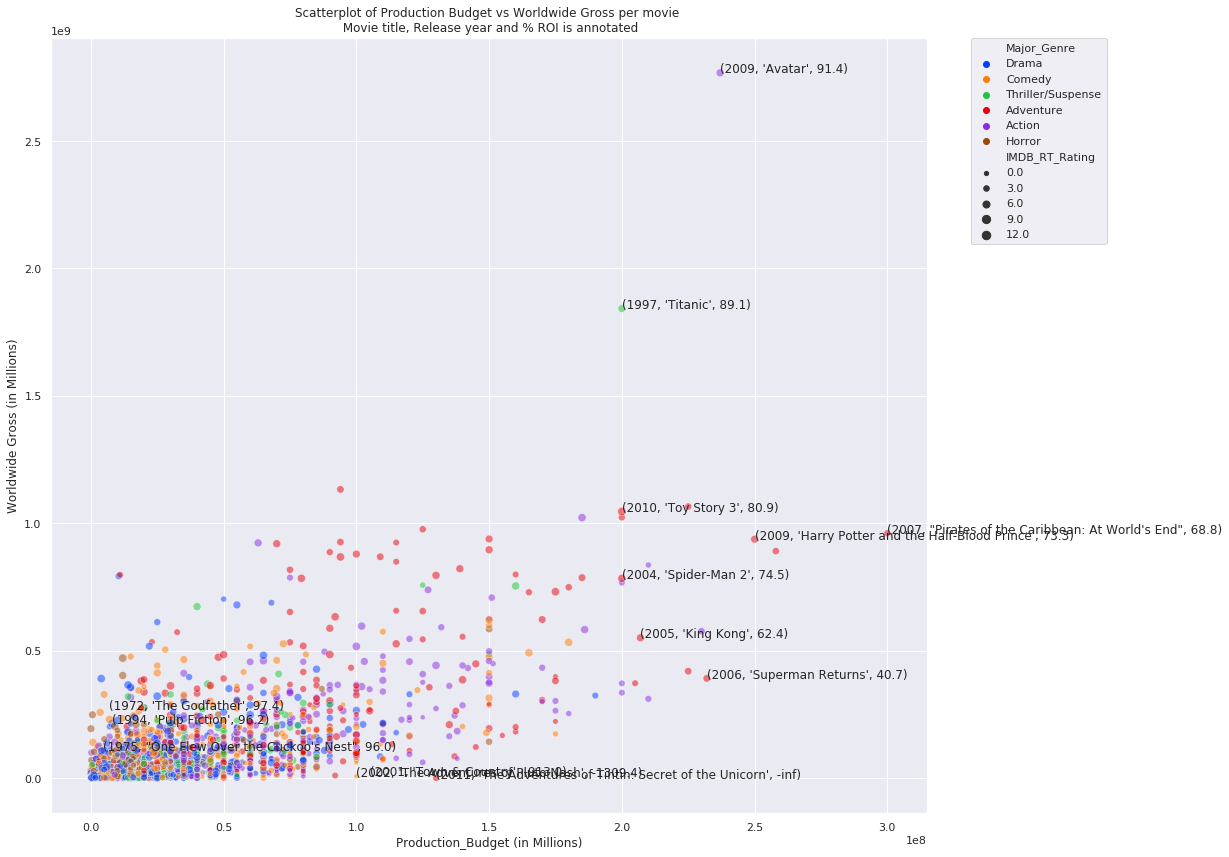

In [5]:
sns.set(rc={'figure.figsize':(15.7,14.27)})

# Save a palette to a variable:
sns.set_palette("bright")

#Build the scatterplot
sns.scatterplot(x='Production_Budget', y='Worldwide_Gross', hue='Major_Genre', size=movies_dataset["IMDB_RT_Rating"], alpha=0.5, data=movies_dataset[(movies_dataset["Major_Genre"]=="Drama") | (movies_dataset["Major_Genre"]=="Action") | (movies_dataset["Major_Genre"]=="Thriller/Suspense") | (movies_dataset["Major_Genre"]=="Comedy") | (movies_dataset["Major_Genre"]=="Horror") | (movies_dataset["Major_Genre"]=="Adventure")])

# Annotate on plot for index, (value1, value2) in enumerate(zip(data1, data2)):
for i,(movie1, movie2,movie3) in enumerate(zip(movies_dataset.year,movies_dataset.Title,movies_dataset.Gross_Margin)):
  if (movies_dataset.IMDB_RT_Rating[i] >= 9.2  and movies_dataset.Production_Budget[i] >= 1500000  and movies_dataset.Production_Budget[i] <= 10000000 and movies_dataset.Worldwide_Gross[i] >= 5000000 ) or (movies_dataset.IMDB_RT_Rating[i] > 9.1 and movies_dataset.Production_Budget[i] >= 230000000 and movies_dataset.Worldwide_Gross[i] >= 155000000 ) or (movies_dataset.IMDB_RT_Rating[i] > 7.0 and movies_dataset.Production_Budget[i] >= 200000000 and movies_dataset.Worldwide_Gross[i] >= 200000000) or ( movies_dataset.Production_Budget[i] >= 100000000 and movies_dataset.Worldwide_Gross[i] <= 15000000) or (movies_dataset.Gross_Margin[i]>98.3 and movies_dataset.Production_Budget[i] >= 50000000) or (movies_dataset.Production_Budget[i] >= 290000000)  : # if i%50==0:
    plt.annotate((movie1,movie2,movie3), (movies_dataset.Production_Budget[i],movies_dataset.Worldwide_Gross[i]))
plt.title('Scatterplot of Production Budget vs Worldwide Gross per movie \n Movie title, Release year and % ROI is annotated')
plt.xlabel('Production_Budget (in Millions)')
plt.ylabel('Worldwide Gross (in Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #src: https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot
plt.show()